In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Columns details

In [2]:
df = pd.read_csv('car_average.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


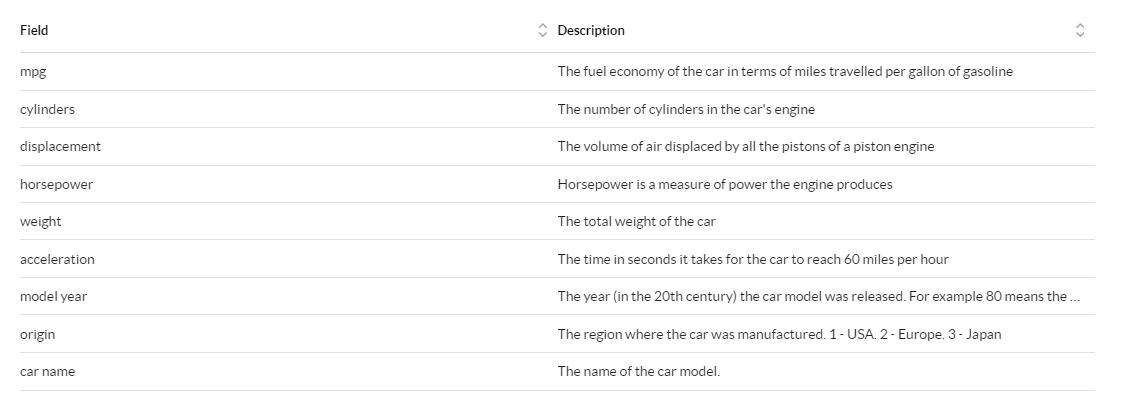

In [260]:
# making a copy of df
df1 = df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# creating a new column of average in KMPL units 
df['kmpl'] = round(df['mpg']*1.609,1)

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kmpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,29.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,24.1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,29.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,25.7
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,27.4


In [12]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
kmpl            129
dtype: int64

In [13]:
# changing origin from 1,2,3 to usa , europe and japan
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [21]:
d= {1:'USA',2:'Europe',3:'Japan'}
df['origin_new'] = df['origin'].map(d)

In [25]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kmpl,origin_new
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,29.0,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,24.1,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,29.0,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,25.7,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,27.4,USA


## Q. What is the average fule efficiency of a car ?

In [31]:
print('The average of all the cars is ',round(df['kmpl'].mean(),1),' KMPL')

The average of all the cars is  37.8  KMPL


### Ans - The average fule efficiency of a car is   37.8   KMPL 

## Q. what is the milage distribution of cars amoung different car makers ?

,kmpl
origin_new,
Europe,44.9
Japan,49.0
USA,32.3


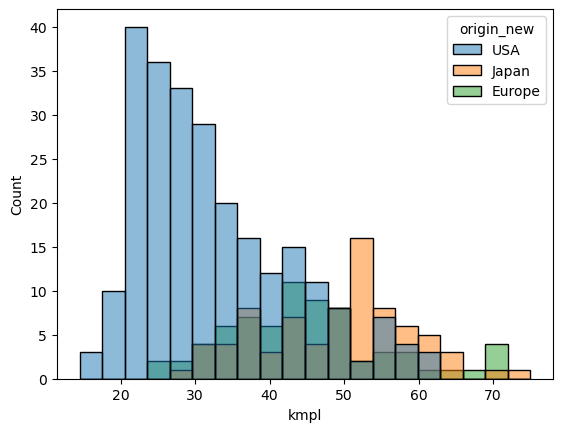

In [190]:
sns.histplot(x='kmpl',data=df,bins=20,
             hue ='origin_new')
round(df.groupby('origin_new')[['kmpl']].mean(),1)

### Ans - As we can see the cars made by USA are lowest fule efficient with mean of 32 kmpl where as europe hase much better with 44 kmpl and japan with the highest fule efficient cars with average of 49 kmpl.

## Q. As japan make the highest fule efficient cars show the distribution of milage distribution of japan?

<Axes: xlabel='kmpl', ylabel='Count'>

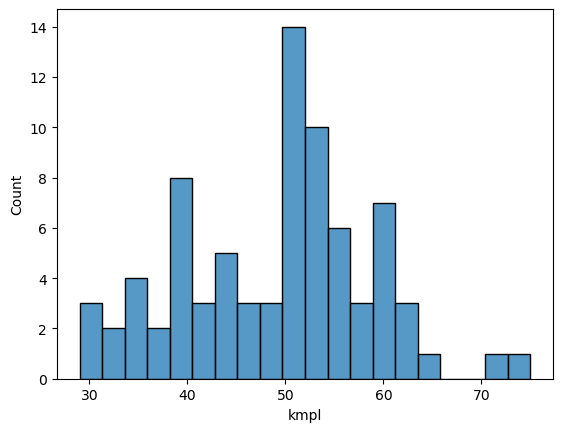

In [72]:
# histogram of cars from only Japan
sns.histplot(x='kmpl',data=(df.loc[df['origin_new']=='Japan']),bins=20)

### Q. Does cylinder counts affect the average of a car ?

Text(0.5, 0, '% of cylinders in a car')

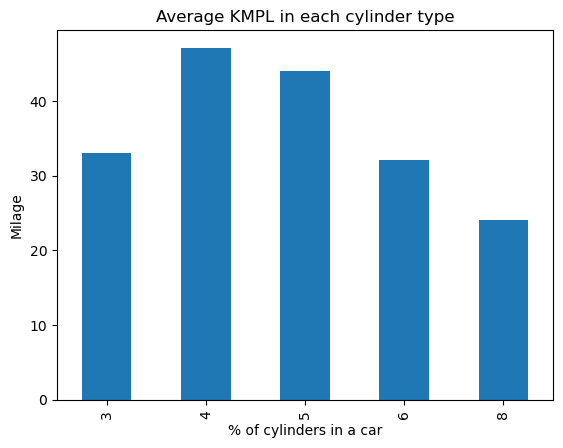

In [192]:
df.sort_values(by='cylinders').groupby('cylinders')['kmpl'].mean().plot(kind='bar',title='Average KMPL in each cylinder type')
plt.ylabel('Milage')
plt.xlabel('% of cylinders in a car')
                                                                       

### Ans - Yes, as we can see the 4 cylinser car gives the highest milage followed by 5 cylinders where as 8 and 3 are the lowest 

In [98]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kmpl,origin_new
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,29.0,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,24.1,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,29.0,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,25.7,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,27.4,USA


## Q. What is the distribution of weight of a car ?

weight of a average car =  2970.4


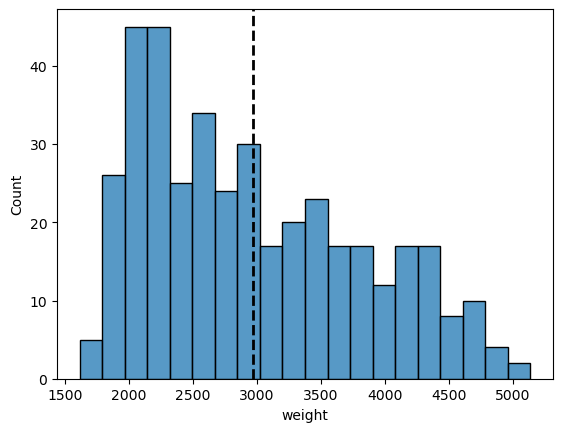

In [214]:
sns.histplot(x='weight',data=df,bins=20)
plt.axvline(df['weight'].mean(),color='black',
            linestyle='dashed',linewidth=2)
print('weight of a average car = ',round(df['weight'].mean(),1))

### Ans- The average cars weight's around 2970 KG where the mejority of car are around 2200 KG of weight and it goes to nearly 5000 KG of weight.

## Q. How much horsepower does a normal car generate ?  

<Axes: xlabel='horsepower', ylabel='Count'>

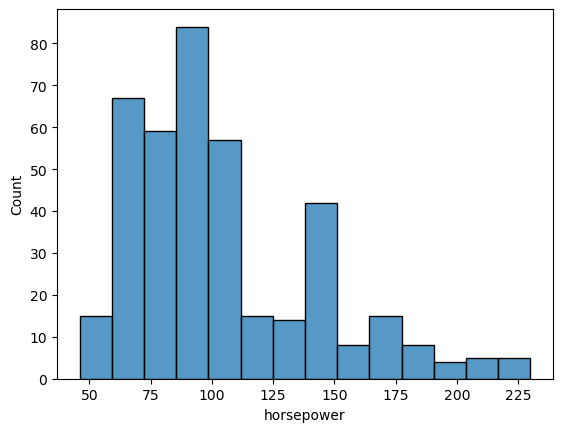

In [129]:
sns.histplot(x='horsepower',data=df)

### Ans - Normally a car generate horsepower between 60 - 110  but when you go for highend car it can generate horse power of 225.

## Q. Is there any relation between displacement and the weight of the car ? 

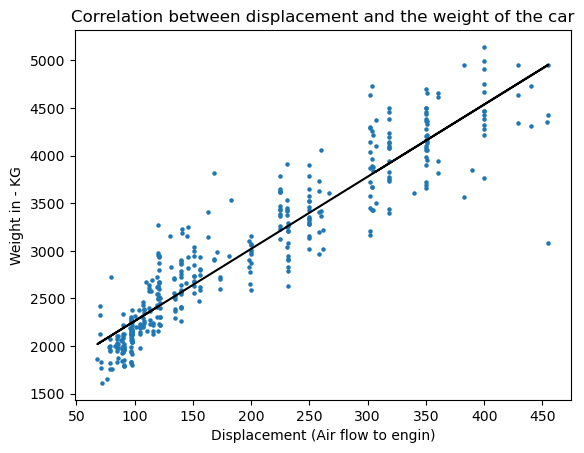

In [166]:
from sklearn.linear_model import LinearRegression as lr
m = lr()
x= np.array(df['displacement']).reshape(-1,1)
m.fit(x,df['weight'])
y = m.predict(x)
plt.plot(x,y,color='black')

plt.scatter(x=df['displacement'],y=df['weight'],s=5)
plt.title('Correlation between displacement and the weight of the car')
plt.xlabel('Displacement (Air flow to engin)')
plt.ylabel('Weight in - KG')
plt.show()

### Ans - Yes, there is a high correlation between the weight of the car and its displacement.

## Q. Does a car's weight make it slow ?

Text(0, 0.5, 'Weight of the car')

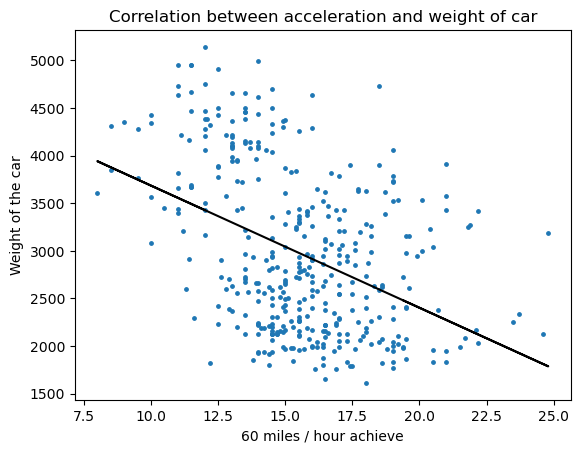

In [186]:
plt.scatter(x=df['acceleration'],y=df['weight'],s=6)
x1 =np.array(df['acceleration']).reshape(-1,1)
model = lr()
model.fit(x1,df['weight'])
y1 = model.predict(x1)
plt.plot(x1,y1,color='black')
plt.title('Correlation between acceleration and weight of car')
plt.xlabel('60 miles / hour achieve')
plt.ylabel('Weight of the car')


### Ans - Yes, a car's weight and it's acceleration time has a negative correlation that means if the car weight increase it will become slower .  

## Q. Is there any relation between the weight of a car and how much horsepower it can generate ?

Text(0.5, 1.0, 'Correlation between Horse power generated by a car and its Weight')

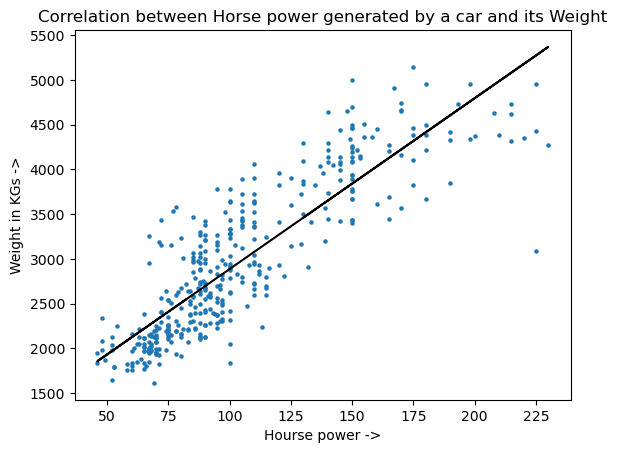

In [245]:
plt.scatter(y=df['weight'],x=df['horsepower'],s=5)
x =np.array(df['horsepower']).reshape(-1,1)
model = lr()
model.fit(x,df['weight'])
y = model.predict(x)
plt.plot(x,y,color='black')
plt.xlabel('Hourse power ->')
plt.ylabel('Weight in KGs ->')
plt.title('Correlation between Horse power generated by a car and its Weight')

### Ans - Yes, there is a high positive correlation between the weight of a car and how much horsepower it generate 

## Q. Find out which car is this who has lowest weight and has high horsepower then other normal cars ?

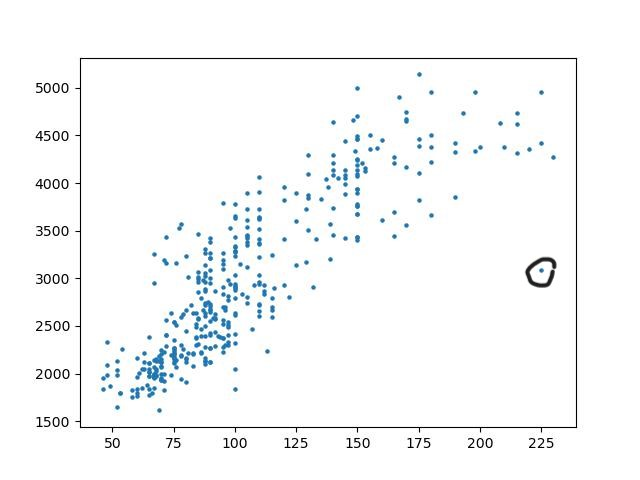

In [234]:
df.loc[(df['weight']>3000) & (df['horsepower']>200)].sort_values(by='weight').head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kmpl,origin_new
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw),22.5,USA


### Ans - The car's name is Buick Estate Wagon made by USA 

## Q. Does the technology for milage improve over time ? 

<Axes: title={'center': 'Milage of cars over the year'}, xlabel='Year of manufacture ->', ylabel=' milage in Kmpl ->'>

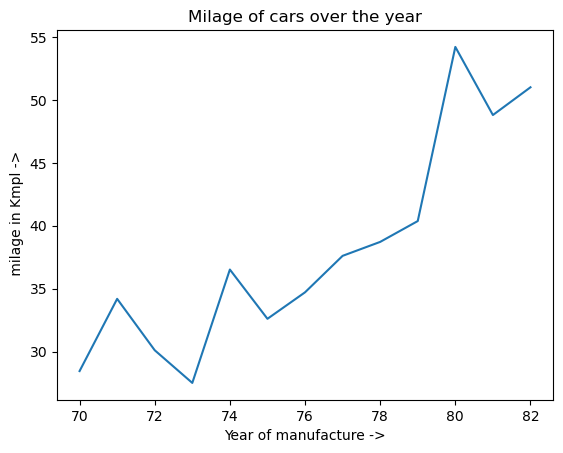

In [259]:
df.groupby('model year')['kmpl'].mean().plot(kind='line',
                                             title='Milage of cars over the year',
                                             xlabel='Year of manufacture ->',
                                             ylabel=' milage in Kmpl ->')


### Ans - Yes, the technology has improved over time as in 70s the car could only give a average of 30 KMPL while the car's of 80s model give a average of 50 KMPL. 